## US-accidents

Download the dataset on accidents in the US here:
https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents.

Data description
https://smoosavi.org/datasets/us_accidents



Done by- **Wurdruw Zurovast & Muksana Khatun**
 

Date-23/10/2022

#### 0. Load packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### 1. Load and inspect the data


In [45]:
# Muksana's filename accidents = pd.read_csv('US_Accidents_Dec21_updated.csv')
# I use the second copy of a dataset for work to prevent overwriting data.
# Zurovast's filename
accidents = pd.read_csv("2022-10-20-traffic-dataset-2-1-.csv")
# Time
accident_time = accidents["ID", "Severity", "Start_Time", "End_Time", "City", "State", 
"Street", "Civil_Twilight", "Visibility(mi)", "Temperature(F)"]
# Weather         
accident_weather = accidents["Weather_Condition", "Temperature(F)", 
"Precipitation(in)", "Distance(mi)", "Side", "Severity", 
"Wind_Chill(F)", "Wind_Speed(mph)", "Pressure(in)", 
"Humidity(%)", "Precipitation(in)"]

KeyError: ('ID', 'Severity', 'Start_Time', 'End_Time', 'City', 'State', 'Street', 'Civil_Twilight', 'Visibility(mi)', 'Temperature(F)')

In [3]:
accidents.head(5)

,ID,Severity,Start_Time,End_Time,Distance(mi),Street,Side,City,State,Temperature(F),Visibility(mi),Precipitation(in),Weather_Condition,Civil_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,3.230,Outerbelt E,R,Dublin,OH,42.1,10.0,0.00,Light Rain,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,0.747,I-70 E,R,Dayton,OH,36.9,10.0,0.02,Light Rain,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,0.055,I-75 S,R,Cincinnati,OH,36.0,10.0,0.02,Overcast,Night
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,0.123,I-77 N,R,Akron,OH,39.0,10.0,NaN,Overcast,Night
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,0.500,I-75 S,R,Cincinnati,OH,37.0,10.0,0.01,Light Rain,Day


In [4]:
accidents.describe()

,Severity,Distance(mi),Temperature(F),Visibility(mi),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.776068e+06,2.774796e+06,2.295884e+06
mean,2.137572e+00,7.026779e-01,6.179356e+01,9.099391e+00,7.016940e-03
std,4.787216e-01,1.560361e+00,1.862263e+01,2.717546e+00,9.348831e-02
min,1.000000e+00,0.000000e+00,-8.900000e+01,0.000000e+00,0.000000e+00
25%,2.000000e+00,5.200000e-02,5.000000e+01,1.000000e+01,0.000000e+00
50%,2.000000e+00,2.440000e-01,6.400000e+01,1.000000e+01,0.000000e+00
75%,2.000000e+00,7.640000e-01,7.600000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,1.551860e+02,1.960000e+02,1.400000e+02,2.400000e+01


In [5]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 14 columns):
 #   Column             Dtype  
---  ------             -----  
 0   ID                 object 
 1   Severity           int64  
 2   Start_Time         object 
 3   End_Time           object 
 4   Distance(mi)       float64
 5   Street             object 
 6   Side               object 
 7   City               object 
 8   State              object 
 9   Temperature(F)     float64
 10  Visibility(mi)     float64
 11  Precipitation(in)  float64
 12  Weather_Condition  object 
 13  Civil_Twilight     object 
dtypes: float64(4), int64(1), object(9)
memory usage: 303.9+ MB


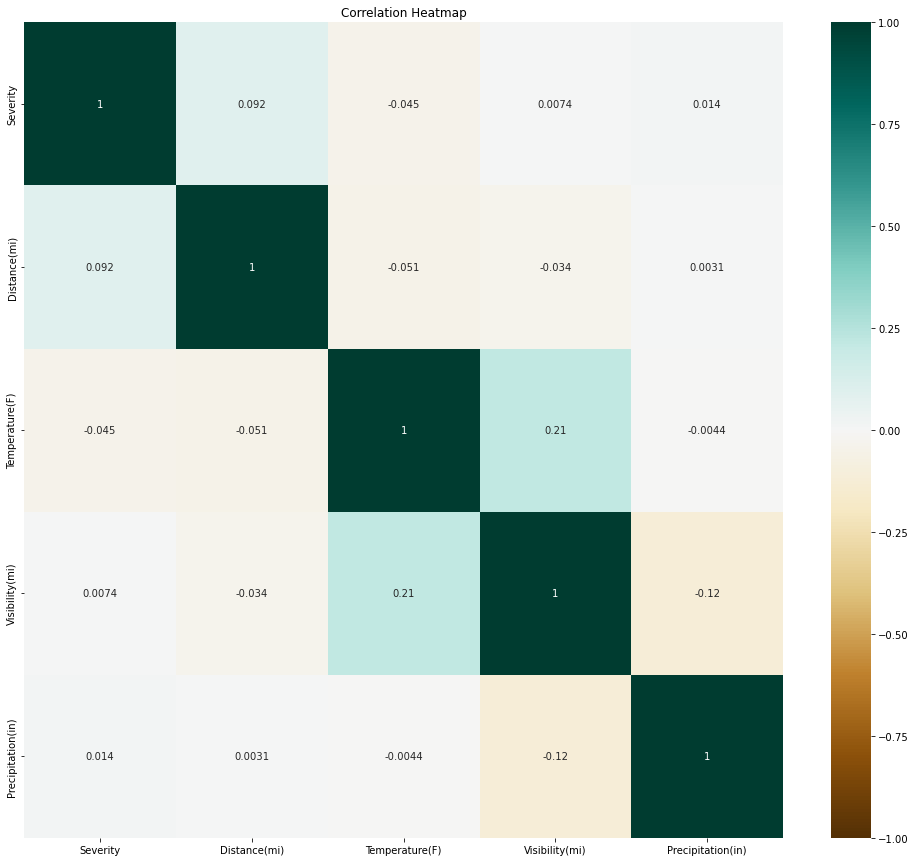

In [6]:
plt.figure(figsize=(17, 15))
heatmap = sns.heatmap(accidents.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap')
plt.show()

In [7]:
accidents.corr()['Severity'].sort_values()

Temperature(F)      -0.045335
Visibility(mi)       0.007371
Precipitation(in)    0.013845
Distance(mi)         0.092140
Severity             1.000000
Name: Severity, dtype: float64

#### 2. Data cleaning and manipulation


In [8]:
accidents.isnull().sum(axis = 0)

ID                        0
Severity                  0
Start_Time                0
End_Time                  0
Distance(mi)              0
Street                    2
Side                      0
City                    137
State                     0
Temperature(F)        69274
Visibility(mi)        70546
Precipitation(in)    549458
Weather_Condition     70636
Civil_Twilight         2867
dtype: int64

In [9]:
round(accidents.isnull().sum() / accidents.shape[0] * 100.00,2)

ID                    0.00
Severity              0.00
Start_Time            0.00
End_Time              0.00
Distance(mi)          0.00
Street                0.00
Side                  0.00
City                  0.00
State                 0.00
Temperature(F)        2.43
Visibility(mi)        2.48
Precipitation(in)    19.31
Weather_Condition     2.48
Civil_Twilight        0.10
dtype: float64

In [10]:
null_accidents = pd.DataFrame((accidents.isnull().sum())*100/accidents.shape[0]).reset_index()
null_accidents.columns = ['Column Name', 'Null Values Percentage']

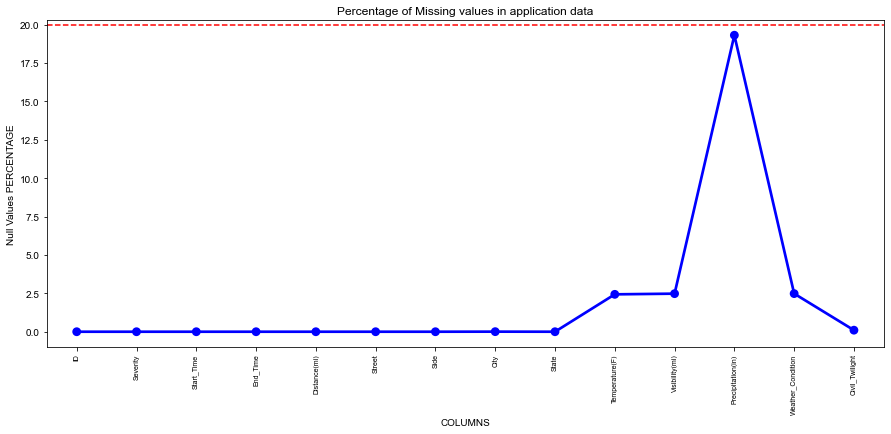

In [11]:
fig = plt.figure(figsize=(15,6))
ax = sns.pointplot(x="Column Name",y="Null Values Percentage",
                   data=null_accidents,color='blue')
sns.set_theme(style="darkgrid")
plt.xticks(rotation =90,fontsize =7)
ax.axhline(20, ls='--',color='red')
plt.title("Percentage of Missing values in application data")
plt.ylabel("Null Values PERCENTAGE")
plt.xlabel("COLUMNS")
plt.show()

In [12]:
nullcol_20_accident = null_accidents[null_accidents["Null Values Percentage"]>=20]
nullcol_20_accident

,Column Name,Null Values Percentage


#### 3.Analysis

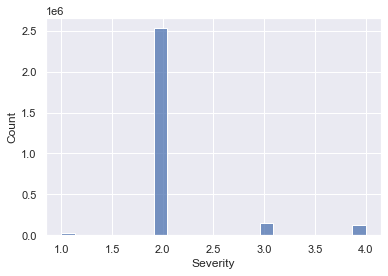

In [46]:
sns.histplot(data=accident_time, x='Severity')
plt.show()

In [47]:
accident_time.Severity.value_counts()

2    2532991
3     155105
4     131193
1      26053
Name: Severity, dtype: int64

In [48]:
sev_2 = accident_time.loc[accidents["Severity"] == 2]

In [16]:
# sev_2.info()

In [17]:
# 2,532,991 Severity 2 accidents.
# sev_2.nunique()

In [18]:
# Viewing the data for sev_2.
sev_2[["Civil_Twilight", "Start_Time", "Street", "Weather_Condition"]].sample()

,Civil_Twilight,Start_Time,Street,Weather_Condition
1057827,Night,2021-04-28 02:00:00,I-5 N,Fair


##### Time of day

In [19]:
type(sev_2["Start_Time"])

pandas.core.series.Series

In [20]:
sev_2.Civil_Twilight.value_counts()

Day      1711077
Night     819542
Name: Civil_Twilight, dtype: int64

In [21]:
# 2/3 of accidents occur in daylight hours.
sev_2.Civil_Twilight.value_counts(normalize=True)*100

Day      67.614959
Night    32.385041
Name: Civil_Twilight, dtype: float64

Text(0.5, 1.0, 'Number of cases by severity and time')

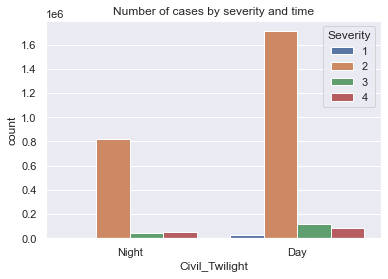

In [22]:
sns.countplot(data=accidents, x="Civil_Twilight", hue="Severity")
plt.title("Number of cases by severity and time")

In [23]:
# The breakdown of severity is similar from day to night.
    # Nighttime accidents slow down traffic for longer 
    # with more Severity 4 than 3 and 0.8% less Severity 1.
round(accidents.groupby("Civil_Twilight")["Severity"].value_counts(normalize=True)*100, 0)

Civil_Twilight  Severity
Day             2           89.0
                3            6.0
                4            4.0
                1            1.0
Night           2           90.0
                4            5.0
                3            5.0
                1            0.0
Name: Severity, dtype: float64

In [24]:
sev_2.Start_Time = pd.to_datetime(sev_2.Start_Time)
sev_2.End_Time = pd.to_datetime(sev_2.End_Time)

C:\Users\cryst\AppData\Local\Temp\ipykernel_21324\853571900.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sev_2.Start_Time = pd.to_datetime(sev_2.Start_Time)
C:\Users\cryst\AppData\Local\Temp\ipykernel_21324\853571900.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sev_2.End_Time = pd.to_datetime(sev_2.End_Time)


In [25]:
sev_2.dtypes.head(4)
# Type check after conversion

ID                    object
Severity               int64
Start_Time    datetime64[ns]
End_Time      datetime64[ns]
dtype: object

In [26]:
sev_2["Start_Hour"] = sev_2.Start_Time.dt.hour

C:\Users\cryst\AppData\Local\Temp\ipykernel_21324\4171050302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sev_2["Start_Hour"] = sev_2.Start_Time.dt.hour


In [27]:
sev_2["Start_Hour"].nunique()

24

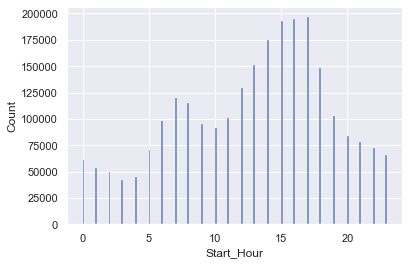

In [28]:
sns.histplot(data=sev_2, x= "Start_Hour")
plt.show()
# sns.histplot(data=sev_2, x= sev_2["Start_Hour"]) Above, forgot ".

In [29]:
# Hours with most accidents are in the afternoon, 12-6PM.
    # The other bump is 6-9AM. These are commute times.
    # The hours between 8PM and 5AM are quieter.
sev_2["Start_Hour"].value_counts().nlargest(13)
# Trying sev_2["Start_Hour"].value_counts().nlargest(3,"Start_Hour")

17    196443
16    194758
15    193223
14    174399
13    151194
18    148349
12    129529
7     119519
8     114888
19    102907
11    100907
6      98232
9      94932
Name: Start_Hour, dtype: int64

In [30]:
sev_2["End_Hour"] = sev_2.End_Time.dt.hour
sev_2["Duration"] =sev_2["End_Hour"] - sev_2["Start_Hour"]

C:\Users\cryst\AppData\Local\Temp\ipykernel_21324\1299160197.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sev_2["End_Hour"] = sev_2.End_Time.dt.hour
C:\Users\cryst\AppData\Local\Temp\ipykernel_21324\1299160197.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sev_2["Duration"] =sev_2["End_Hour"] - sev_2["Start_Hour"]


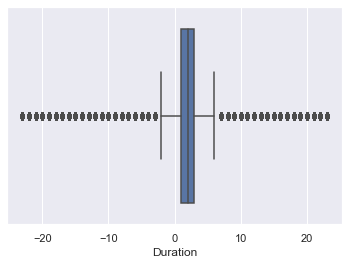

In [31]:
sns.boxplot(data=sev_2, x="Duration")
plt.show()

In [32]:
sev_2["Duration_Day"] =sev_2["End_Time"] - sev_2["Start_Time"]

C:\Users\cryst\AppData\Local\Temp\ipykernel_21324\3717487098.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sev_2["Duration_Day"] =sev_2["End_Time"] - sev_2["Start_Time"]


In [33]:
# The mean accident in the category took 5 hours. The least
    # took 2 minutes. The median as above of 2 hours is 
    # smaller than the mean possibly meaning a large time 
    # range. And the longest accident in the category could 
    # have been misrecorded.
sev_2["Duration_Day"].describe()

count                      2532991
mean     0 days 05:36:55.886205600
std      6 days 01:31:06.896457201
min                0 days 00:02:00
25%                0 days 01:15:32
50%                0 days 02:00:04
75%                0 days 03:16:49
max             1168 days 10:59:17
Name: Duration_Day, dtype: object

C:\Users\cryst\AppData\Local\Temp\ipykernel_21324\2377530358.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sev_2["Start_Day"] = sev_2.Start_Time.dt.day


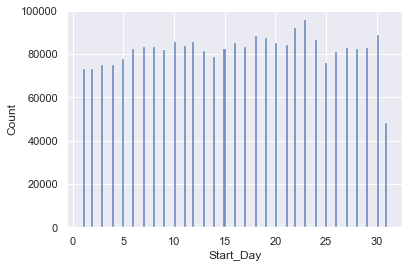

In [34]:
# Except for the 31st, the amount of accidents has 0 slope.
sev_2["Start_Day"] = sev_2.Start_Time.dt.day
sns.histplot(data=sev_2, x= "Start_Day")
plt.show()

C:\Users\cryst\AppData\Local\Temp\ipykernel_21324\2920452405.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sev_2["Start_Dw"] = sev_2.Start_Time.dt.day_name()


Text(0.5, 0, '')

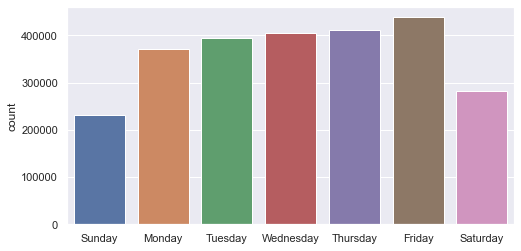

In [35]:
sev_2["Start_Dw"] = sev_2.Start_Time.dt.day_name()
day_of_week_order = ["Sunday", "Monday", "Tuesday", "Wednesday",
             "Thursday", "Friday", "Saturday"]
plt.figure(figsize=(8,4))
sns.countplot(data=sev_2, x= "Start_Dw", order= day_of_week_order)
# ax.tick_params(axis='y', which='both', pad=60) label to graph
plt.xlabel("")

In [36]:
# Not as many accidents of this severity happen on weekends. 
    # This could be because there are more people out due 
    # to work on the weekdays. There is a gradual increase 
    # in accidents through the workweek ending with Friday. 
    # Saturday had more  accidents than Sunday.

C:\Users\cryst\AppData\Local\Temp\ipykernel_21324\3165410759.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sev_2["Start_Month"] = sev_2.Start_Time.dt.month_name()


Text(0.5, 0, 'Accidents by month')

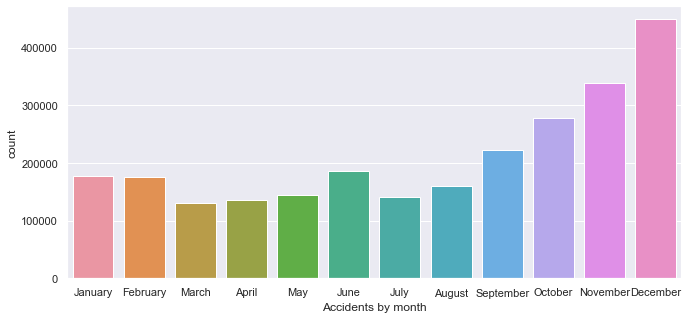

In [37]:
# The holiday season may have had an effect on travel from 
    # November to January and cold weather in winter. 
    # Summer break might have increased the amount of people 
    # outside in June.
month_order = ['January', 'February', 'March', 'April', 
               'May', 'June', 'July', 'August', 'September',
               'October', 'November', 'December']
plt.figure(figsize=(11,5))
sev_2["Start_Month"] = sev_2.Start_Time.dt.month_name()
# Ha ha! "month_order" as xticks.
    # sns.countplot(data=sev_2, x= "Start_Month", order=month_order)
sns.countplot(data=sev_2, x= "Start_Month", order=month_order)
plt.xlabel("Accidents by month")

##### Weather

In [49]:
A_weather = accidents[['ID','Severity','Temperature(F)' ,'Wind_Chill(F)','Wind_Speed(mph)' ,'Pressure(in)',
                       'Humidity(%)' ,'Precipitation(in)']].copy()
A_weather.head(3)

,ID,Severity,Temperature(F),Wind_Chill(F),Wind_Speed(mph),Pressure(in),Humidity(%),Precipitation(in)
0,A-1,3,42.1,36.1,10.4,29.76,58.0,0.00
1,A-2,2,36.9,NaN,NaN,29.68,91.0,0.02
2,A-3,2,36.0,NaN,NaN,29.70,97.0,0.02


In [50]:
A_weather.corr()['Severity'].sort_values()

Wind_Chill(F)       -0.097459
Temperature(F)      -0.045335
Precipitation(in)    0.013845
Humidity(%)          0.037802
Pressure(in)         0.043883
Wind_Speed(mph)      0.048382
Severity             1.000000
Name: Severity, dtype: float64

In [51]:
A_weather['Temperature(F)'].nunique()

788

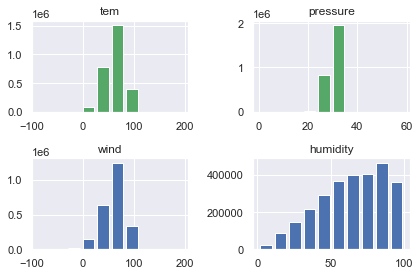

In [52]:
fig, axs = plt.subplots(nrows=2, ncols=2)

axs[0, 0].hist(data=A_weather, x='Temperature(F)' , histtype='bar', facecolor='g',rwidth=0.8)
axs[0, 0].set_title('tem')

axs[0, 1].hist(data=A_weather, x='Pressure(in)',  histtype='bar', facecolor='g',rwidth=0.8)
axs[0, 1].set_title('pressure')

axs[1, 0].hist(data=A_weather, x='Wind_Chill(F)', histtype='bar', rwidth=0.8)
axs[1, 0].set_title('wind')

axs[1, 1].hist(data=A_weather, x='Humidity(%)',  histtype='bar', rwidth=0.8)
axs[1, 1].set_title('humidity')

fig.tight_layout()
plt.show()

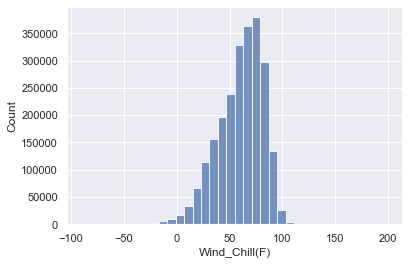

In [53]:
sns.histplot(data=A_weather, x='Wind_Chill(F)', binwidth=8)
plt.show()

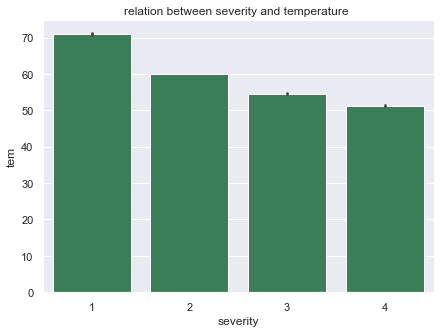

In [54]:
plt.figure(figsize = (7,5))
sns.barplot(x= 'Severity', y ='Wind_Chill(F)', data=A_weather , color="seagreen")
plt.title('relation between severity and temperature ')
plt.xlabel('severity')
plt.ylabel('tem')
plt.show()

In [55]:
A_road = accidents[['ID','Severity','Crossing','Station','Traffic_Signal','Traffic_Calming',
                   'Stop','Junction','No_Exit','Railway','Turning_Loop']].copy()
A_road.head(3)

,ID,Severity,Crossing,Station,Traffic_Signal,Traffic_Calming,Stop,Junction,No_Exit,Railway,Turning_Loop
0,A-1,3,False,False,False,False,False,False,False,False,False
1,A-2,2,False,False,False,False,False,False,False,False,False
2,A-3,2,False,False,False,False,False,True,False,False,False


In [56]:
A_road.corr()['Severity'].sort_values()

Crossing          -0.035382
Station           -0.018017
Traffic_Signal    -0.012798
Traffic_Calming   -0.003009
Stop              -0.002536
No_Exit           -0.002359
Railway           -0.001747
Junction           0.045928
Severity           1.000000
Turning_Loop            NaN
Name: Severity, dtype: float64

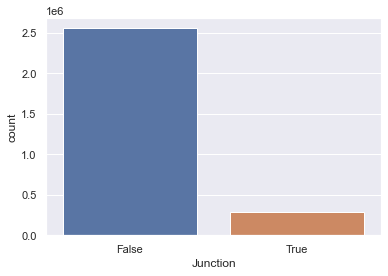

In [57]:
sns.countplot(data=A_road, x='Junction' )
plt.show()

**state**

In [58]:
#state wise = sw
sw_counts = accidents.groupby('State')['ID'].count().reset_index()
sw_counts = sw_counts.sort_values(by = "ID",ascending=False)

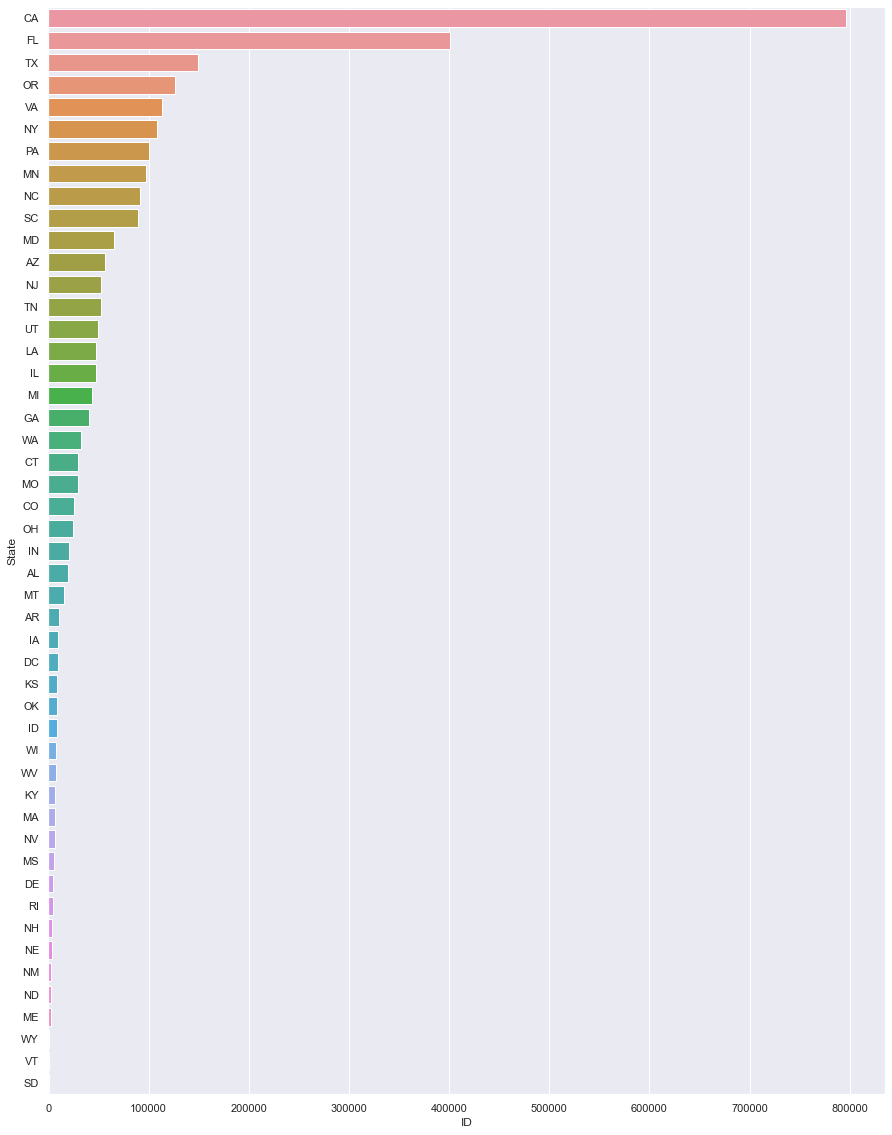

In [59]:
f, ax = plt.subplots(figsize=(15, 20))
sns.barplot(y="State", x="ID", data=sw_counts)
plt.show()

In [60]:
accidents_by_cities = accidents['City'].value_counts()
accidents_by_cities[:5]
# Top 5 cities by number of accidents

Miami          106966
Los Angeles     68956
Orlando         54691
Dallas          41979
Houston         39448
Name: City, dtype: int64

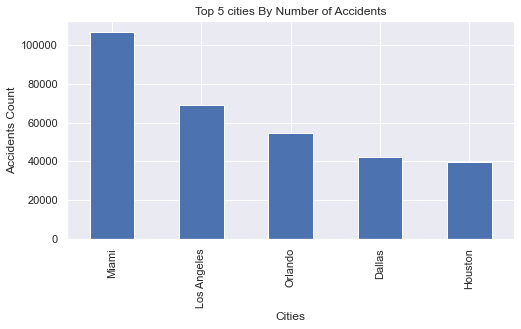

In [61]:
fig, ax = plt.subplots(figsize=(8,4))
accidents_by_cities[:5].plot(kind='bar')
ax.set(title = 'Top 5 cities By Number of Accidents',
       xlabel = 'Cities',
       ylabel = 'Accidents Count')
plt.show()
#Chart to Visualize Top 5 cities by number of accidents

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=2)

axs[0, 0].bar(data=A_road, x='Junction',height=6)
axs[0, 0].set_title('tem')

axs[0, 1].bar(data=A_road, x='Crossing',height=6)
axs[0, 1].set_title('pressure')

axs[1, 0].bar(data=A_weather, x='Railway',height=6)
axs[1, 0].set_title('wind')

axs[1, 1].bar(data=A_weather, x='No_Exit',height=6)
axs[1, 1].set_title('humidity')

fig.tight_layout()
plt.show()

KeyboardInterrupt: 